In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#show graph and images inside the notebook
%matplotlib inline

In [3]:
#load the training data
train_data = pd.read_csv("male_vs_female_classification/train.csv")

In [4]:
train_data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [5]:
#build a keras/TF training model
train_data["class"].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [6]:
from glob import glob
path = "male_vs_female_classification/images"
images = glob(path+"/*.jpg")

In [7]:
images

['male_vs_female_classification/images/4958.jpg',
 'male_vs_female_classification/images/5172.jpg',
 'male_vs_female_classification/images/9901.jpg',
 'male_vs_female_classification/images/49.jpg',
 'male_vs_female_classification/images/5170.jpg',
 'male_vs_female_classification/images/7349.jpg',
 'male_vs_female_classification/images/2598.jpg',
 'male_vs_female_classification/images/11690.jpg',
 'male_vs_female_classification/images/2992.jpg',
 'male_vs_female_classification/images/8399.jpg',
 'male_vs_female_classification/images/5935.jpg',
 'male_vs_female_classification/images/13066.jpg',
 'male_vs_female_classification/images/20343.jpg',
 'male_vs_female_classification/images/5632.jpg',
 'male_vs_female_classification/images/17376.jpg',
 'male_vs_female_classification/images/6208.jpg',
 'male_vs_female_classification/images/20521.jpg',
 'male_vs_female_classification/images/15547.jpg',
 'male_vs_female_classification/images/22989.jpg',
 'male_vs_female_classification/images/24660.

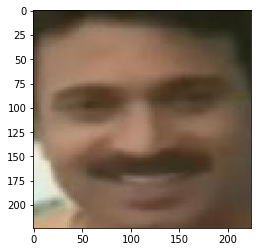

In [8]:
#inspect the image

img = plt.imread(images[0])
plt.imshow(img)

In [9]:
#dim of the image
img.shape

(224, 224, 3)

#### free primary memory as much as posiible

In [10]:
del img
del images

#### Create the imgaedata list from the given training data

In [11]:
X = list()
for i in train_data['image_names']:
    X.append(plt.imread(path+"/"+i))

In [12]:
#convert to numpy array
X=np.array(X)
X.shape

(12196, 224, 224, 3)

In [13]:
Y = train_data['class']
Y.shape

(12196,)

### save original data for future

In [14]:
import pickle
pickle.dump((X,Y),open("original.pickle","wb"))


#### convert labels to categorical type

In [15]:
import tensorflow as tf
sess = tf.Session()

from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [16]:
from keras.utils import to_categorical

In [17]:
Y = to_categorical(Y)
Y.shape

(12196, 2)

#### Scale the image data using VGG's preprocessing
check the max and min values of the image input.

usually between 0 and 255(8 bit).

standardizes and speeds up training process.

In [18]:
X.min(),X.max()

(0, 255)

In [19]:
from keras.applications.vgg16 import preprocess_input

In [20]:
X = preprocess_input(X, mode='tf')
X.min(),X.max()

(-1.0, 1.0)

In [21]:
X

array([[[[-0.6156863 , -0.5686275 , -0.6784314 ],
         [-0.6156863 , -0.5686275 , -0.6784314 ],
         [-0.6156863 , -0.5686275 , -0.6784314 ],
         ...,
         [-0.78039217, -0.8901961 , -0.9137255 ],
         [-0.7490196 , -0.85882354, -0.88235295],
         [-0.78039217, -0.8901961 , -0.9137255 ]],

        [[-0.6156863 , -0.5686275 , -0.6784314 ],
         [-0.6156863 , -0.5686275 , -0.6784314 ],
         [-0.6156863 , -0.5686275 , -0.6784314 ],
         ...,
         [-0.7882353 , -0.8980392 , -0.92156863],
         [-0.75686276, -0.8666667 , -0.8901961 ],
         [-0.7882353 , -0.8980392 , -0.92156863]],

        [[-0.6       , -0.5686275 , -0.6784314 ],
         [-0.6       , -0.5686275 , -0.6784314 ],
         [-0.6       , -0.5686275 , -0.6784314 ],
         ...,
         [-0.77254903, -0.88235295, -0.90588236],
         [-0.7411765 , -0.8509804 , -0.8745098 ],
         [-0.77254903, -0.88235295, -0.90588236]],

        ...,

        [[-0.27843136, -0.6392157 , -0

In [22]:
Y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

#### Split the data into train and test sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.3, random_state=42)

### We may delete iamage data in X to free the memory

In [25]:
#del X

#### use the vgg pretrained model

In [26]:
from keras.applications.resnet50 import ResNet50

In [27]:
pre_model = ResNet50(weights='imagenet')

In [28]:
pre_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

#### scale the input image to the pretrained model image input

the input is already in the same format as per the pretrained model.

To avoid any processing issues, resize all the input image data

In [29]:
pre_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

/home/raghuvardhan/anaconda3/envs/ds_common/lib/python3.6/site-packages/keras_applications/resnet50.py:263: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [30]:
pre_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

#### AIM

    Extract features
    
    Reshape the data
    
    Rescale features
    
    Create top model
    
    Train the model



In [31]:
base_model_pred = pre_model.predict(X_train)
base_model_pred_valid = pre_model.predict(X_valid)

In [32]:
base_model_pred.shape

(8537, 7, 7, 2048)

In [33]:
base_model_pred_valid.shape

(3659, 7, 7, 2048)

In [34]:
base_model_pred = base_model_pred.reshape(base_model_pred.shape[0], base_model_pred.shape[1]*base_model_pred.shape[2]*base_model_pred.shape[3])

In [35]:
base_model_pred_valid = base_model_pred_valid.reshape(base_model_pred_valid.shape[0],base_model_pred_valid.shape[1]*base_model_pred_valid.shape[2]*base_model_pred_valid.shape[3])

In [36]:
base_model_pred.max()

22.31439

In [37]:
max_val = base_model_pred.max()
max_val_pred = base_model_pred_valid.max()
maxval = max(max_val,max_val_pred)
base_model_pred = base_model_pred / maxval
base_model_pred_valid = base_model_pred_valid / maxval

In [38]:
base_model_pred.min(), base_model_pred.max()

(0.0, 1.0)

In [39]:
base_model_pred_valid.min(),base_model_pred_valid.max()

(0.0, 0.96223134)

In [40]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Flatten
from keras.layers.core import Dropout

In [41]:
model = Sequential()
model.add(InputLayer((7*7*2048, )))

model.add(Dense(units=8192, activation='relu',kernel_initializer='random_uniform'))    
Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=1024, activation='relu',kernel_initializer='random_uniform'))    
Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=2, activation='softmax'))
#model.add(Dense(units=1, activation='softmax'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8192)              822091776 
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              8389632   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2050      
Total params: 830,483,458
Trainable params: 830,483,458
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras import optimizers
from keras import metrics as mt
from keras import losses

In [44]:

#model.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy') #0.2974749414133294
#optimizer = optimizers.adagrad(lr=0.005)#0.5414984430719394
#optimizer = optimizers.adagrad(lr=0.001)#0.5338385125266019
#optimizer = optimizers.adagrad(lr=0.005)#0.4842853238589779
#optimizer = optimizers.adagrad(lr=0.001)#val_acc: 0.8888
optimizer = optimizers.adagrad(lr=0.0002)

#optimizer = optimizers.adam(lr=0.002)#acc: 1.0000
#optimizer = optimizers.adam(lr=0.001)
#optimizer = optimizers.SGD(lr=0.002)#0.8789
#loss = losses.sparse_categorical_crossentropy
#metrics = metrics.sparse_categorical_crossentropy
#loss = losses.categorical_crossentropy
#metrics = mt.categorical_accuracy
#model.compile(optimizer=optimizer, metrics=[metrics],loss=loss)
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
epochs=40 

model.fit(base_model_pred, y_train, epochs=epochs, validation_data=(base_model_pred_valid, y_valid))

Train on 8537 samples, validate on 3659 samples
Epoch 1/40


In [ ]:
predictions = model.predict_classes(base_model_pred_valid)
predictions

In [ ]:
#_, valid_images, _, valid_class = train_test_split(train_data["image_names"], train_data["class"], test_size=0.3, random_state=42)

In [ ]:
import pandas as pd
sample = pd.read_csv('sample_submission_yAxnSkN.csv')
sample.head()

#### Training with entire data

X.shape

base_model_pred = pre_model.predict(X)
#base_model_pred_valid = pre_model.predict(Y)

base_model_pred.shape

base_model_pred = base_model_pred.reshape(base_model_pred.shape[0], 7*7*512)

base_model_pred.max()

maxval = base_model_pred.max()
base_model_pred = base_model_pred / maxval

base_model_pred.min(), base_model_pred.max()

epochs=240
model.fit(base_model_pred, Y, epochs=epochs)

#### Load the test data into a dataframe

In [ ]:
test_data = pd.read_csv("male_vs_female_classification/test.csv")
test_data.head()

In [ ]:
test_data.shape

In [ ]:
test_images = list()
for i in test_data['image_names']:
    test_images.append(plt.imread(path+"/"+i))

In [ ]:
test_images=np.array(test_images)
test_images.shape

In [ ]:
test_images.min(),(test_images.max())

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
test_images = preprocess_input(test_images, mode='tf')
test_images.min(),test_images.max()

In [ ]:
test_images.shape

In [ ]:
test_images = pre_model.predict(test_images)

In [ ]:
test_images.shape

In [ ]:
test_images.max()

In [ ]:
test_images = test_images/test_images.max()

In [ ]:
test_images.max(),test_images.min()

In [ ]:
test_images = test_images.reshape(test_images.shape[0],7*7*512)

In [ ]:
predictions = model.predict_classes(test_images)
predictions

In [ ]:
result = pd.DataFrame(index=None)

In [ ]:
result['image_names']=test_data['image_names']
result['class']=predictions

In [ ]:
result.to_csv(path_or_buf='result_resnet.csv',index=False)